In [245]:
# libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

In [246]:
# Get the data (csv file is hosted on the web)
# Importar os dados através do url
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [247]:
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...

# Cada Continente representa, através de uma categoria 'continent', um valor -> número

data['continent']=pd.Categorical(data['continent'])

In [248]:
anos=data.year.unique()

<IPython.core.display.Javascript object>


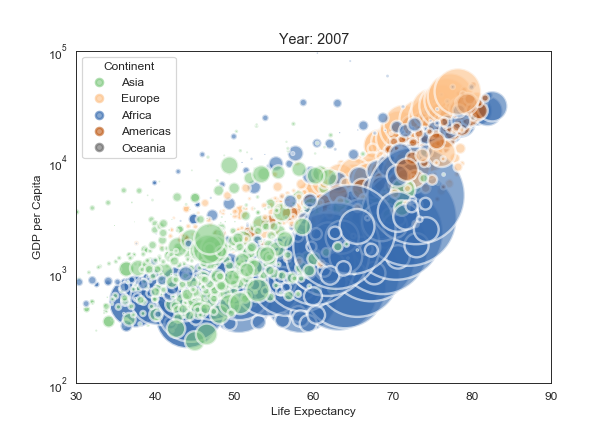

In [253]:
%matplotlib notebook
%matplotlib notebook

# initialize a figure
#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

# Add titles (main and on axis)

# Definir títulos e limites
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)

# Definir os elementos da coluna "continent" como únicos 
uniqueCont = data['continent'].unique()

# Criar animação

def animate(i):
    # Definir título
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    # Definir elementos como as coordenadas, escala, cor, transparência, cor da borda exterior e espessura da linha.
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    #scut=ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    
    # Definir legenda através da variável 'uniqueCont'
    # O elemento 'legend_elements()' é usado quando 'c=' é passado como um número e é mapeado com colormap.
    # Assim, criamos a legenda, colocamos os elementos associados ao nome através da variável 'uniqueCont' e definimos o título.
    plt.legend(handles = scut.legend_elements()[0] , labels = uniqueCont, title= "Continent")
    
# Correr a animação sendo a sua duração o número de anos existente, com um intervalo entre 'imagens' de 200 e sem repetição da aanimação.    
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)
    
plt.show()


## B - Temos “bolhas” de cinco (5) cores diferentes. O que representa cada cor? Justifique, com descrição detalhada do processo.

In [ ]:
Cada cor representa um continente. As cores atribuídas provêm do colormap 'accent'.
O tamanho das bolhas é proporcional à média da população de cada continente

